In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import matplotlib.pyplot as plt
import zlib
import sys
import compress
import random
import lzma
import math

In [5]:
data_df = pd.read_csv('C1_160308.txt', sep=",", engine='python')
data_df.columns = ['Time', 'X', 'Y', 'Z']
data_df = data_df.dropna()

data_df['X'] = round(data_df['X']/0.0078125)
data_df['Y'] = round(data_df['Y']/0.0078125)
data_df['Z'] = round(data_df['Z']/0.0078125)
data_df = data_df.astype({'X': 'int16',
               'Y': 'int16',
               'Z': 'int16'})

In [6]:
x_values = data_df['X'].tolist()
y_values = data_df['Y'].tolist()
z_values = data_df['Z'].tolist()

In [7]:
codes={}

def frequency (str) :
    freqs = {}
    for ch in str :
        freqs[ch] = freqs.get(ch,0) + 1
    return freqs

def sortFreq (freqs) :
    letters = freqs.keys()
    tuples = []
    for let in letters :
        tuples.append((freqs[let],let))
    tuples.sort()
    return tuples

def buildTree(tuples) :
    while len(tuples) > 1 :
        leastTwo = tuple(tuples[0:2])                  # get the 2 to combine
        theRest  = tuples[2:]                          # all the others
        combFreq = leastTwo[0][0] + leastTwo[1][0]     # the branch points freq
        tuples   = theRest + [(combFreq,leastTwo)]     # add branch point to the end
#         print(tuples)
        tuples.sort(key=lambda t: t[0])                                  # sort it into place
    return tuples[0]            # Return the single tree inside the list

def trimTree (tree) :
     # Trim the freq counters off, leaving just the letters
    p = tree[1]                                    # ignore freq count in [0]
    if type(p) == type("") : return p              # if just a leaf, return it
    else : return (trimTree(p[0]), trimTree(p[1])) # trim left then right and recombine
    
def assignCodes (node, pat='') :
    global codes
    if type(node) == type("") :
        codes[node] = pat                # A leaf. set its code
    else  :                              #
        assignCodes(node[0], pat+"0")    # Branch point. Do the left branch
        assignCodes(node[1], pat+"1")    # then do the right branch.

def encode_str (str) :
    global codes
    output = ""
    for ch in str : output += codes[ch]
    return output

def decode_str (tree, string_to_decode) :
    output = ""
    p = tree
    for bit in string_to_decode:
#         print(bit, type(bit), p)
        if bit == '0' : p = p[0]     # Head up the left branch
        else          : p = p[1]     # or up the right branch
        if type(p) == type("") :
            output += p              # found a character. Add to output
            p = tree                 # and restart for next character
    return output

In [8]:
def huff_code(how_many_readings, values, start_value):
    initial = values[start_value]
    diff_string = []
    for i in range(start_value, start_value + int(how_many_readings)):
        diff_string.append(values[i] - initial)
    
    lst_joined = ','.join(map(str, diff_string))
    str_with_initial = str(initial) + ':' + lst_joined # final string with initial and differences
    
    codes = {}
    fre = frequency(str_with_initial)
    tuples_for_tree = sortFreq(fre)
    tree = buildTree(tuples_for_tree)
    trimmed_tree = trimTree(tree)
    assignCodes(trimmed_tree)
    encoded = encode_str(str_with_initial)
    return encoded

In [13]:
# all huffman in BITS as of 16/11/2019
huff_x_50 = []
huff_y_50 = []
huff_z_50 = []

huff_x_100 = []
huff_y_100 = []
huff_z_100 = []

huff_x_150 = []
huff_y_150 = []
huff_z_150 = []

huff_x_200 = []
huff_y_200 = []
huff_z_200 = []

huff_x_250 = []
huff_y_250 = []
huff_z_250 = []

huff_x_300 = []
huff_y_300 = []
huff_z_300 = []

huff_x_350 = []
huff_y_350 = []
huff_z_350 = []

for i in range(10000):
    start = random.randint(0, 650000)
#     num_of_readings = 70
#     for i in range(50, 351, 50):
    huff_x_50.append(len(huff_code(50, x_values, start)))
    huff_y_50.append(len(huff_code(50, y_values, start)))
    huff_z_50.append(len(huff_code(50, z_values, start)))
    
    huff_x_100.append(len(huff_code(100, x_values, start)))
    huff_y_100.append(len(huff_code(100, y_values, start)))
    huff_z_100.append(len(huff_code(100, z_values, start)))
    
    huff_x_150.append(len(huff_code(150, x_values, start)))
    huff_y_150.append(len(huff_code(150, y_values, start)))
    huff_z_150.append(len(huff_code(150, z_values, start)))
    
    huff_x_200.append(len(huff_code(200, x_values, start)))
    huff_y_200.append(len(huff_code(200, y_values, start)))
    huff_z_200.append(len(huff_code(200, z_values, start)))
    
    huff_x_250.append(len(huff_code(250, x_values, start)))
    huff_y_250.append(len(huff_code(250, y_values, start)))
    huff_z_250.append(len(huff_code(250, z_values, start)))
    
    huff_x_300.append(len(huff_code(300, x_values, start)))
    huff_y_300.append(len(huff_code(300, y_values, start)))
    huff_z_300.append(len(huff_code(300, z_values, start)))
    
    huff_x_350.append(len(huff_code(350, x_values, start)))
    huff_y_350.append(len(huff_code(350, y_values, start)))
    huff_z_350.append(len(huff_code(350, z_values, start)))
    

In [14]:
huff_df = pd.DataFrame(data=list(zip(huff_x_50, huff_y_50, huff_z_50,
                                    huff_x_100, huff_y_100, huff_z_100,
                                    huff_x_150, huff_y_150, huff_z_150,
                                    huff_x_200, huff_y_200, huff_z_200,
                                    huff_x_250, huff_y_250, huff_z_250,
                                    huff_x_300, huff_y_300, huff_z_300,
                                    huff_x_350, huff_y_350, huff_z_350)),
                      columns=['50x_com', '50y_com', '50z_com',
                              '100x_com', '100y_com', '100z_com',
                              '150x_com', '150y_com', '150z_com',
                              '200x_com', '200y_com', '200z_com',
                              '250x_com', '250y_com', '250z_com',
                              '300x_com', '300y_com', '300z_com',
                              '350x_com', '350y_com', '350z_com'])

huff_df['50_com'] = huff_df['50x_com'] + huff_df['50y_com'] + huff_df['50z_com']
huff_df['100_com'] = huff_df['100x_com'] + huff_df['100y_com'] + huff_df['100z_com']
huff_df['150_com'] = huff_df['150x_com'] + huff_df['150y_com'] + huff_df['150z_com']
huff_df['150_com'] = huff_df['200x_com'] + huff_df['200y_com'] + huff_df['200z_com']
huff_df['250_com'] = huff_df['250x_com'] + huff_df['250y_com'] + huff_df['250z_com']
huff_df['300_com'] = huff_df['300x_com'] + huff_df['300y_com'] + huff_df['300z_com']
huff_df['350_com'] = huff_df['350x_com'] + huff_df['350y_com'] + huff_df['350z_com']

huff_df['50_uc'] = 42*50
huff_df['100_uc'] = 42*100
huff_df['150_uc'] = 42*150
huff_df['200_uc'] = 42*200
huff_df['250_uc'] = 42*250
huff_df['300_uc'] = 42*300
huff_df['350_uc'] = 42*350

huff_df

,50x_com,50y_com,50z_com,100x_com,100y_com,100z_com,150x_com,150y_com,150z_com,200x_com,...,250_com,300_com,350_com,50_uc,100_uc,150_uc,200_uc,250_uc,300_uc,350_uc
0,359,494,582,891,1136,1231,1489,1805,1841,2045,...,9041,10618,12224,2100,4200,6300,8400,10500,12600,14700
1,514,823,654,1155,1676,1373,1787,2551,2211,2550,...,11258,13556,15753,2100,4200,6300,8400,10500,12600,14700
2,412,649,605,919,1270,1294,1383,1976,1943,1765,...,9001,10774,12500,2100,4200,6300,8400,10500,12600,14700
3,416,793,772,884,1663,1442,1355,2522,2216,2001,...,10383,12212,14344,2100,4200,6300,8400,10500,12600,14700
4,332,518,759,707,1182,1604,1137,2052,2414,1588,...,9583,11284,13069,2100,4200,6300,8400,10500,12600,14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,548,589,777,1075,1434,1609,1678,2269,2378,2294,...,10318,12169,14089,2100,4200,6300,8400,10500,12600,14700
9996,480,583,552,1059,1254,1167,1646,1907,2039,2173,...,9509,11280,13037,2100,4200,6300,8400,10500,12600,14700
9997,419,626,771,798,1266,1628,1284,1952,2522,1771,...,10163,11980,14012,2100,4200,6300,8400,10500,12600,14700
9998,566,579,655,1265,1279,1301,2086,2050,1980,2886,...,10867,13160,15066,2100,4200,6300,8400,10500,12600,14700


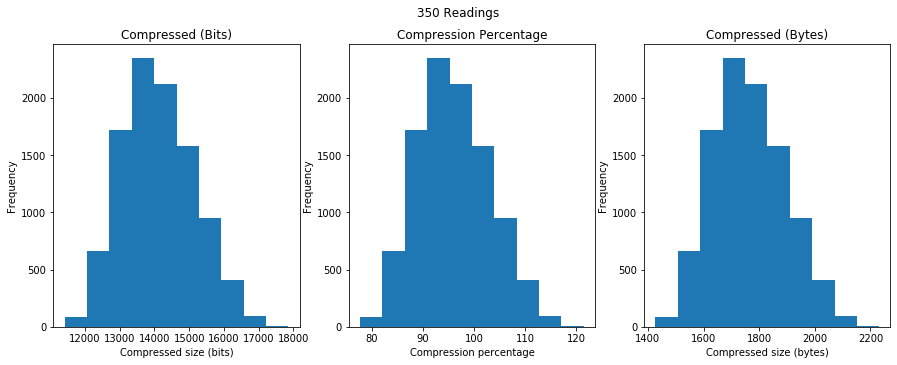

In [15]:
# histograms for huffman coding for 350 readings

from pylab import rcParams
import matplotlib.gridspec as gridspec
rcParams['figure.figsize'] = 15, 5.2 # width, height (both in inches)
gs = gridspec.GridSpec(1, 3) # 1 row, 3 columns

fig = plt.figure()
ax = fig.add_subplot(gs[0, 0])
ax.hist(huff_df['350_com'])
ax.set_xlabel('Compressed size (bits)')
ax.set_ylabel('Frequency')
# ax.axhline(y=bits_df['350_uc'][0], xmin=0, xmax=1, color='r')
ax.title.set_text('Compressed (Bits)')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(huff_df['350_com']*100/huff_df['350_uc'])
ax2.set_xlabel('Compression percentage')
ax2.set_ylabel('Frequency')
ax2.title.set_text('Compression Percentage')

ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(huff_df['350_com']/8)
ax3.set_xlabel('Compressed size (bytes)')
ax3.set_ylabel('Frequency')
# ax3.axhline(y=bits_df['350_uc'][0]/8, xmin=0, xmax=1, color='r')
ax3.title.set_text('Compressed (Bytes)')

plt.suptitle('350 Readings')
plt.show()